# (연습) 이산 확률 분포

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

## 타이타닉 데이터셋

타이타닉호의 승객에 대한 정보와 생존 여부를 담은 데이터셋을 불러온다.

In [7]:
titanic = pd.read_csv(data_url+"titanic.csv")

각 생존자별로 12개의 정보가 포함된다.

| 특성 | 의미 |
| :--- | :--- |
| PassengerId  | 승객 번호 |
| Survived | 생존 여부. 0 또는 1. 1일 때 생존 |
| Pclass | 승객 클래스 |
| Name | 승객 이름 |
| Sex | 승객의 성 |
| Age | 승객 나이 |
| SibSp | 타이타닉에 함께 승선한 형제자매와 배우자의 수 |
| Parch | 타이타닉에 함께 승선한 자녀와 부모의 수 |
| Ticket | 티켓 번호 |
| Fare | 티켓 요금(영구 파운드화) |
| Cabin | 객실 번호 |
| Embarked | 승객이 타이타닉호에 승선한 항구 |
| | C=Cherbourg, Q=Queenstown, S=Southampton |

In [8]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


먼저 `PassengerId` 특성을 인덱스로 지정한다.

In [9]:
titanic = titanic.set_index("PassengerId")
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


데이터셋의 크기인 891보다 적은 수의 `non-null` 값을 갖는 특성에 결측치가 존재한다.

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


`Embarked` 특성의 결측치를 모두 해당 특성의 최빈값으로 대체한다.

In [11]:
embarked_mode =(titanic['Embarked'].mode().values)[0]
titanic['Embarked'] = titanic['Embarked'].fillna(embarked_mode)

`Age` 특성의 결측치를 성(Sex)별 중앙값으로 대체한다.

In [12]:
f_mask = titanic["Sex"]=="female"
f_age_median = titanic.loc[f_mask, "Age"].median()
print("여성 평균연령:", f_age_median)

여성 평균연령: 27.0


In [13]:
m_age_median = titanic.loc[~f_mask, "Age"].median()
print("남성 평균연령:", m_age_median)

남성 평균연령: 29.0


In [14]:
titanic.loc[f_mask, 'Age'] = titanic.loc[f_mask, 'Age'].fillna(f_age_median)
titanic.loc[~f_mask, 'Age'] = titanic.loc[~f_mask, 'Age'].fillna(m_age_median)

`Cabin` 특성을 제외한 모든 결측치가 사라졌음을 확인한다.

In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**문제 1**

아래 코드는 `Age` 특성을 10살 단위로 구분하는 연령구간을 지정하여 `Age_Bucket` 특성으로 추가한다.

In [16]:
titanic['Age_Bucket'] = (titanic["Age"] // 10 * 10).astype('i8')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bucket
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,10
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,NaN,S,20


확률 변수 $X$가 타이타닉 데이터셋에서 임의로 선택된 사람의 나이대를 가리킨다고 하자.

(1) 확률 변수 $X$의 확률 분포를 가리키는 데이터프레임을 선언하는 코드를 작성하여라.

In [38]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
total = titanic.groupby('Age_Bucket')['Survived'].count().sum()
X = titanic.groupby('Age_Bucket')['Survived'].count()/total
X

,Survived
Age_Bucket,
0,0.069585
10,0.114478
20,0.445567
30,0.187430
40,0.099888
50,0.053872
60,0.021324
70,0.006734
80,0.001122


(2) 확률 변수 $X$의 확률 분포가 확률의 성질을 만족함을 보이는 코드를 작성하여라.

In [41]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
print(X) # 모든 확률은 0과 1사이의 값이다
X.sum() # 모든 확률의 합은 1이다

Age_Bucket
0     0.069585
10    0.114478
20    0.445567
30    0.187430
40    0.099888
50    0.053872
60    0.021324
70    0.006734
80    0.001122
Name: Survived, dtype: float64


np.float64(1.0000000000000002)

(3) 확률 변수 $X$의 확률 질량 함수를 선언한 다음에 30대에 포함될 확률을 계산하여라.

In [44]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
def f_age(x):
    return X[x]

f_age(10)

np.float64(0.11447811447811448)

(4) 확률 변수$X$의 누적 분포 함수를 선언하고, 50대 이하에 속할 확률을 계산하여라.

In [46]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
def age_cdf(x):
    return X[X.index <= x].sum()

age_cdf(50)

np.float64(0.9708193041526375)

**문제 2**

`Embarked` 특성은 승객이 탑승한 항구를 구분한다.

In [47]:
titanic.Embarked.value_counts()

,count
Embarked,
S,646
C,168
Q,77


각 기호가 가리키는 항구와 방문 순서는 다음과 같다.

| 순서 | 기호 | 항구 |
| :---: | :---: | :--- |
| 1 | Q | Queenstown(퀸즈타운, 영국) |
| 2 | C | Cherbourg(셰르부르, 프랑스) |
| 3 | S | Southampton(사우스햄튼, 아일랜드 |

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/Titanic_voyage.png" style="width:750px"></div></p>

확률 변수 $Y$가 `Embarked` 특성의 값을 가리키도록 한다.

(1) 확률 변수 $Y$의 확률 분포를 가리키는 데이터프레임을 선언하는 코드를 작성하여라.

In [62]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
Y_total = titanic.Embarked.value_counts().sum()
Y = titanic.Embarked.value_counts()/Y_total
df_Y = Y.reset_index()
df_Y.columns = ['Embarked', 'Probability']
df_Y

,Embarked,Probability
0,S,0.725028
1,C,0.188552
2,Q,0.086420


(2) 확률 변수 $Y$의 확률 질량 함수를 선언한 다음에 Cherbourg에서 승객이 탑승했을 확률을 계산하여라.

In [63]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
def f_embarked(x):
    return df_Y[df_Y['Embarked'] == x]['Probability'].values[0]

f_embarked('C')

np.float64(0.18855218855218855)

(3) 이산 결합 확률 변수 $(X, Y)$의 이산 결합 확률 밀도 함수를 구현한 다음에
임의로 선택된 20대 승객이면서 Queenstown에서 탑승했을 확률을 계산하여라.

In [70]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
cats_crossed = pd.crosstab(titanic['Age_Bucket'], titanic['Embarked'], margins=True)
def p_XY(x, y):
    count = cats_crossed.loc[x, y]
    pop = cats_crossed.loc['All', 'All']
    return count / pop
p_XY(20, 'Q')

np.float64(0.06060606060606061)

(4) 이산 결합 확률 변수 $(X, Y)$의 이산 확률 분포의 히트맵을 그리는 코드를 작성하여라.

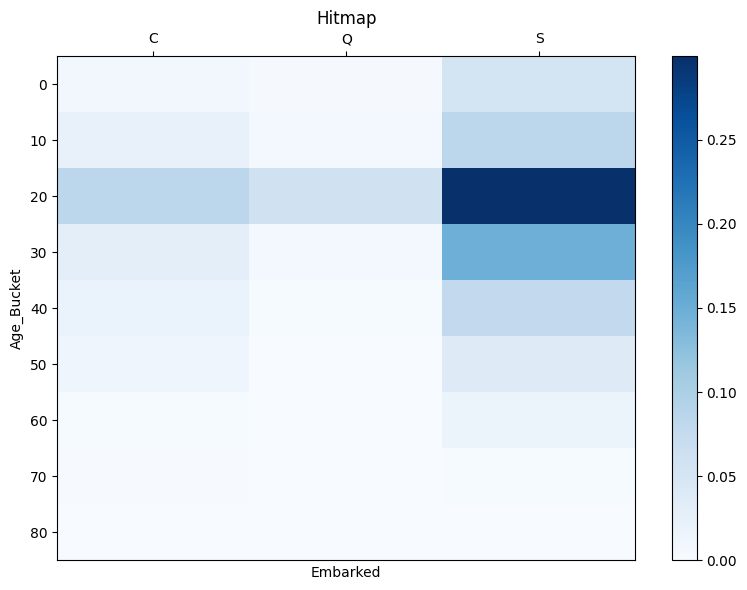

In [90]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
total = cats_crossed.loc['All', 'All']
p_XY_df = cats_crossed / total

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

row, col = p_XY_df.shape

row -= 1
col -= 1

c = ax.pcolor(p_XY_df.iloc[:row, :col], cmap='Blues')

ax.set_xticks(np.arange(col) + 0.5, minor=False)
ax.set_yticks(np.arange(row) + 0.5, minor=False)
ax.set_xticklabels(p_XY_df.columns[:-1])
ax.set_yticklabels(p_XY_df.index[:-1])
ax.invert_yaxis()
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.set_xlabel('Embarked')
ax.set_ylabel('Age_Bucket')
fig.colorbar(c, ax=ax)
plt.title("Hitmap")
plt.tight_layout()
plt.show()

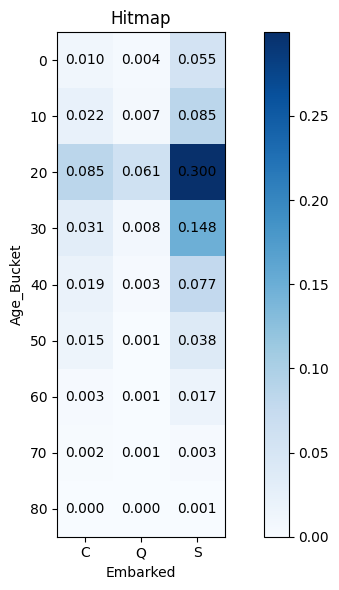

In [91]:
age_buckets = cats_crossed.index.drop('All')
embarked_ports = cats_crossed.columns.drop('All')

prob_matrix = np.array([[p_XY(age, port) for port in embarked_ports] for age in age_buckets])

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(prob_matrix, cmap='Blues')

ax.set_xticks(np.arange(len(embarked_ports)))
ax.set_yticks(np.arange(len(age_buckets)))
ax.set_xticklabels(embarked_ports)
ax.set_yticklabels(age_buckets)
ax.set_xlabel("Embarked")
ax.set_ylabel("Age_Bucket")
ax.set_title("Hitmap")

for i in range(len(age_buckets)):
    for j in range(len(embarked_ports)):
        ax.text(j, i, f"{prob_matrix[i, j]:.3f}", ha='center', va='center', color='black')

fig.colorbar(cax)
plt.tight_layout()
plt.show()

(5) 이산 결합 확률 변수 $(X, Y)$에 대한 조건부 확률 질량 함수를 선언한 다음에
Southhampton에서 탑승한 사람이 40대일 확률을 계산하여라.

In [102]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
def p_XY(x, y):
    joint = cats_crossed.loc[x, y]
    marginal_y = cats_crossed.loc['All', y]
    return joint / marginal_y

p_XY(40, 'S')

np.float64(0.10681114551083591)

(6) 이산 결합 확률 변수 $(X, Y)$의 이산 확률 질량 함수로부터 각 확률 변수에 대한 확률 질량 함수를 정의한 다음에
앞서 선언한 확률 질량 함수와 동일함을 보이는 코드를 구현하여라.

In [112]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
total = cats_crossed.loc['All', 'All']
def p_XY_pmf(x, y):
    return cats_crossed.loc[x, y] / total

def p_X(x):
    row_sum = cats_crossed.loc[x, 'All']
    return row_sum / total

def p_Y(y):
    col_sum = cats_crossed.loc['All', y]
    return col_sum / total

In [113]:
X_d = titanic.groupby('Age_Bucket')['Survived'].count()
X_d = X_d / X_d.sum()

X_df = pd.Series({x: p_X(x) for x in X_d.index})

df_x = pd.DataFrame({
    '결합 확률 변수': X_df,
    '기존 확률 변수': X_d
    })
df_x

,결합 확률 변수,기존 확률 변수
0,0.069585,0.069585
10,0.114478,0.114478
20,0.445567,0.445567
30,0.187430,0.187430
40,0.099888,0.099888
50,0.053872,0.053872
60,0.021324,0.021324
70,0.006734,0.006734
80,0.001122,0.001122


In [114]:
Y_d = titanic['Embarked'].value_counts(normalize=True)

Y_fd = pd.Series({y: p_Y(y) for y in Y_d.index})

df_y = pd.DataFrame({
    '결합 확률 변수': Y_fd,
    '기존 확률 변수': Y_d
})

df_y

,결합 확률 변수,기존 확률 변수
S,0.725028,0.725028
C,0.188552,0.188552
Q,0.086420,0.086420
